# PROJECT 3A_RTS: Big data analysis of an electricity power consumption (Tetouan Town - Morocco) and visualizing Prediction results

## 1) Import useful libraries¶

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

## 2) Retrieve the dataset

In [2]:
consumptionTetuan=pd.read_csv("Tetuan City power consumption.csv")

In [3]:
zone1 = consumptionTetuan['Zone 1 Power Consumption']
zone2 = consumptionTetuan['Zone 2  Power Consumption'] 
zone3 = consumptionTetuan['Zone 3  Power Consumption']

## 3) Model of Decision Tree regressor

In [4]:
features=['Temperature', 'Humidity', 'Wind Speed', "general diffuse flows", "diffuse flows"]
X = consumptionTetuan[features]
y = zone1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [5]:
print("Size of y_test:",y_test.shape)
print("Size of y_train:", y_train.shape)

Size of y_test: (10484,)
Size of y_train: (41932,)


In [6]:
forest_model1 = RandomForestRegressor(random_state=1)
forest_model1.fit(X_train, y_train)
preds = forest_model1.predict(X_test)
print("MAE =", mean_absolute_error(y_test, preds))

MAE = 3237.5613953924076


In [7]:
features=['Temperature', 'Humidity', 'Wind Speed', "general diffuse flows", "diffuse flows"]
X = consumptionTetuan[features]
y = zone2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
forest_model2 = RandomForestRegressor(random_state=1)
forest_model2.fit(X_train, y_train)
preds = forest_model2.predict(X_test)
print("MAE =", mean_absolute_error(y_test, preds))

MAE = 2373.19417928289


In [9]:
features=['Temperature', 'Humidity', 'Wind Speed', "general diffuse flows", "diffuse flows"]
X = consumptionTetuan[features]
y = zone3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
forest_model3 = RandomForestRegressor(random_state=1)
forest_model3.fit(X_train, y_train)
preds = forest_model3.predict(X_test)
print(mean_absolute_error(y_test, preds))

2444.23095325496


In [11]:
# avec heure
consumptionTetuan['DateTime']=pd.to_datetime(consumptionTetuan['DateTime']) 
def conv(data):
    data['month']=data['DateTime'].dt.month
    data['day']=data['DateTime'].dt.day
    data['hour']=data['DateTime'].dt.hour    
    return data

consumptionTetuan = conv(consumptionTetuan)

In [12]:
consumptionTetuan.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,month,day,hour
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,1,1,0
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,1,1,0
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,1,1,0
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,1,1,0
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,1,1,0


In [13]:
features=['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows', 'hour']
X = consumptionTetuan[features]
y = zone1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
forest_model1_Hours = RandomForestRegressor(random_state=1)
forest_model1_Hours.fit(X_train, y_train)
preds = forest_model1_Hours.predict(X_test)
print("MAE = ", mean_absolute_error(y_test, preds))

MAE =  1202.0458924047691


In [15]:
features=['Temperature', 'Humidity', 'Wind Speed', "general diffuse flows", "diffuse flows", "hour"]
X = consumptionTetuan[features]
y = zone2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [16]:
forest_model2_Hours = RandomForestRegressor(random_state=1)
forest_model2_Hours.fit(X_train, y_train)
preds = forest_model2_Hours.predict(X_test)
print("MAE = ", mean_absolute_error(y_test, preds))

MAE =  1179.7490336374733


In [17]:
features=['Temperature', 'Humidity', 'Wind Speed', "general diffuse flows", "diffuse flows", "hour"]
X = consumptionTetuan[features]
y = zone3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [18]:
forest_model3_Hours = RandomForestRegressor(random_state=1)
forest_model3_Hours.fit(X_train, y_train)
preds = forest_model3_Hours.predict(X_test)
print("MAE = ", mean_absolute_error(y_test, preds))

MAE =  1363.1287815171129


In [19]:
X_test['Zone 3 Power Consumption'] = y_test
X_test['Zone 3 Power predictions'] = preds

In [20]:
X_test

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,hour,Zone 3 Power Consumption,Zone 3 Power predictions
25500,20.46,89.70,4.916,0.055,0.141,2,21184.98462,19987.093632
40040,20.59,68.96,4.920,0.077,0.115,1,13375.80547,15890.619300
35066,27.01,46.78,4.922,784.000,66.450,12,13967.55873,17298.604229
27275,25.00,61.83,4.909,598.400,99.700,9,23612.38494,23726.744319
3329,9.85,70.80,0.083,0.051,0.115,2,14550.36145,13675.566463
...,...,...,...,...,...,...,...,...
9269,12.77,74.90,0.087,113.900,107.800,8,12240.00000,11809.237965
33689,21.55,53.88,4.926,0.095,0.063,22,29781.06583,25025.944038
21133,21.55,72.30,4.921,328.400,323.500,18,20276.59919,17832.329811
40112,25.02,44.41,4.920,449.700,206.500,13,13048.99696,15576.122350


Text(0.5, 1.0, 'Consommation de la zone 3 et la prediction du modèle')

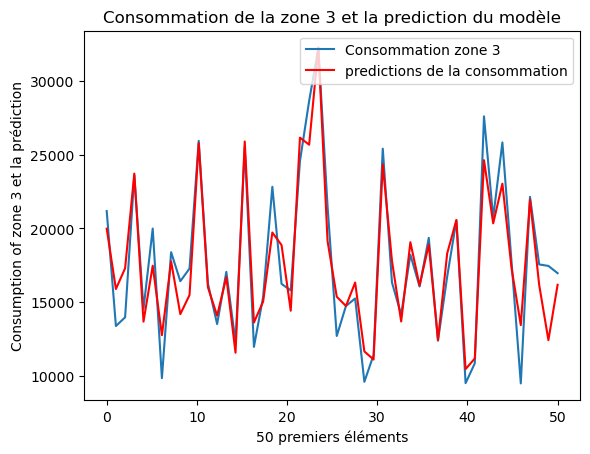

In [21]:
x = np.linspace(0,50,50) # start, stop, nombre point

plt.plot(x,y_test[0:50], label='Consommation zone 3')
plt.plot(x, preds[0:50], c='r', label='predictions de la consommation')
plt.xlabel("50 premiers éléments")
plt.ylabel("Consumption of zone 3 et la prédiction")
plt.legend()
plt.title("Consommation de la zone 3 et la prediction du modèle")

Text(0.5, 1.0, 'Consommation de la zone 3 et la prediction du modèle')

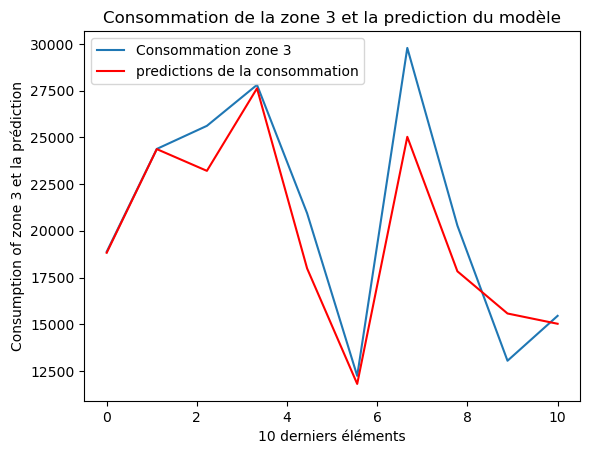

In [22]:
x = np.linspace(0,10,10)

plt.plot(x,y_test[(len(y_test)-10): (len(y_test))], label='Consommation zone 3')
plt.plot(x, preds[(len(preds)-10): (len(preds))], c='r', label='predictions de la consommation')
plt.xlabel("10 derniers éléments")
plt.ylabel("Consumption of zone 3 et la prédiction")
plt.legend()
plt.title("Consommation de la zone 3 et la prediction du modèle")

In [23]:
abs(y_test[(len(y_test)-10):(len(y_test))]-preds[len(preds)-10:len(preds)])

7131       53.464937
13239       9.137235
1262     2407.372194
14518     187.105453
5755     2950.828211
9269      430.762035
33689    4755.121792
21133    2444.269379
40112    2527.125390
7206      424.240276
Name: Zone 3  Power Consumption, dtype: float64

In [24]:
y_test[(len(y_test)-10): (len(y_test))]

7131     18877.74874
13239    24378.18182
1262     25613.49398
14518    27805.09091
5755     20938.61307
9269     12240.00000
33689    29781.06583
21133    20276.59919
40112    13048.99696
7206     15450.69347
Name: Zone 3  Power Consumption, dtype: float64

In [25]:
preds[len(preds)-10:len(preds)]

array([18824.2838033 , 24369.0445847 , 23206.1217856 , 27617.9854573 ,
       17987.7848592 , 11809.23796453, 25025.9440382 , 17832.3298107 ,
       15576.1223501 , 15026.4531945 ])